In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('dark_background')

In [2]:
iris =  datasets.load_iris()

In [3]:
iris_pd= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['target'])

In [4]:
iris_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_pd['sepal area (cm^2)']=iris_pd.iloc[:,0].mul(iris_pd.iloc[:,1])
iris_pd['petal area (cm^2)']=iris_pd.iloc[:,2].mul(iris_pd.iloc[:,3])
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal area (cm^2),petal area (cm^2)
0,5.1,3.5,1.4,0.2,0.0,17.85,0.28
1,4.9,3.0,1.4,0.2,0.0,14.70,0.28
2,4.7,3.2,1.3,0.2,0.0,15.04,0.26
3,4.6,3.1,1.5,0.2,0.0,14.26,0.30
4,5.0,3.6,1.4,0.2,0.0,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,20.10,11.96
146,6.3,2.5,5.0,1.9,2.0,15.75,9.50
147,6.5,3.0,5.2,2.0,2.0,19.50,10.40
148,6.2,3.4,5.4,2.3,2.0,21.08,12.42


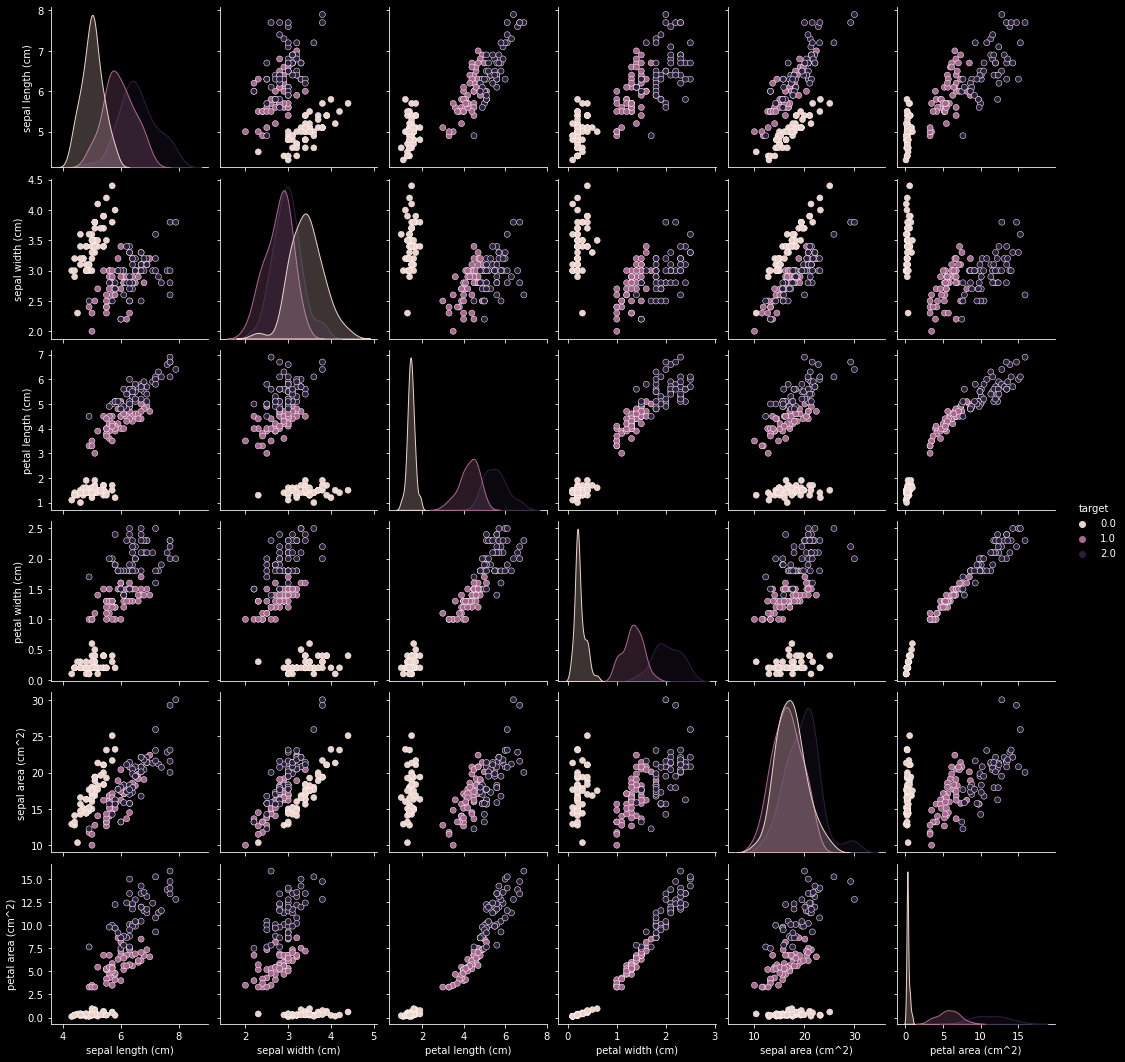

In [6]:
a=sns.pairplot(iris_pd, hue = "target")

Petal area seems to give pretty crisp seaborn plot whereas sepal area isn't so much...

In [7]:
Area_target_pd=iris_pd[['petal area (cm^2)','target']]
target0value=Area_target_pd[Area_target_pd['target']==0].sort_values('petal area (cm^2)',ascending=False)
target0value.iloc[0,0]

0.96

Using Perceptron Learning Algorithm (PLA) to classify target 0 versus 1 using the petal area (cm^2) data.

In [8]:
NewData=Area_target_pd[Area_target_pd['target']!=2]
A=np.array(NewData.loc[:,'petal area (cm^2)'])
X=np.vstack([np.ones(len(A)),A])
B=np.array(NewData.loc[:,'target'])
Y=np.array([-1 if x==0 else x for x in B])
w=np.zeros(2)

In [23]:
for j in range (0,len(Y)):        
        if np.dot(X[:,j],w)>=0 and Y[j]<0:
            w=w-X[:,j]
        elif np.dot(X[:,j],w)<0 and Y[j]>=0:
            w=w+X[:,j]
        else:
            w=w
w

array([-5. ,  3.5])

In [24]:
ClassLine=np.c_[X[1,:],np.dot(w,X)]

In [25]:
PLAClass=pd.DataFrame(data=np.c_[X[0,:],X[1,:],Y])
PLAClass.columns= ['first feature'] + ['second feature']+['Classification']
PLAClass

,first feature,second feature,Classification
0,1.0,0.28,-1.0
1,1.0,0.28,-1.0
2,1.0,0.26,-1.0
3,1.0,0.30,-1.0
4,1.0,0.28,-1.0
...,...,...,...
95,1.0,5.04,1.0
96,1.0,5.46,1.0
97,1.0,5.59,1.0
98,1.0,3.30,1.0


<ipython-input-26-e1bb8e05742d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=-30)


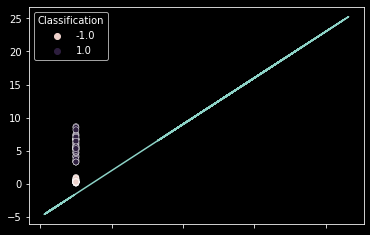

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(data=PLAClass,x=X[0,:],y=X[1,:],hue="Classification",color='b')
plt.plot(X[1,:],np.dot(w,X))
labels = ax.get_xticklabels() 
ax.set_xticklabels(labels, rotation=-30)
plt.show()

In [27]:
T=[]
for j in range (0,len(Y)):  
    a=T.append(np.dot(X[:,j],w))
    b=Y[j]
T=np.array(T)    
np.c_[T,Y]

array([[-4.02 , -1.   ],
       [-4.02 , -1.   ],
       [-4.09 , -1.   ],
       [-3.95 , -1.   ],
       [-4.02 , -1.   ],
       [-2.62 , -1.   ],
       [-3.53 , -1.   ],
       [-3.95 , -1.   ],
       [-4.02 , -1.   ],
       [-4.475, -1.   ],
       [-3.95 , -1.   ],
       [-3.88 , -1.   ],
       [-4.51 , -1.   ],
       [-4.615, -1.   ],
       [-4.16 , -1.   ],
       [-2.9  , -1.   ],
       [-3.18 , -1.   ],
       [-3.53 , -1.   ],
       [-3.215, -1.   ],
       [-3.425, -1.   ],
       [-3.81 , -1.   ],
       [-2.9  , -1.   ],
       [-4.3  , -1.   ],
       [-2.025, -1.   ],
       [-3.67 , -1.   ],
       [-3.88 , -1.   ],
       [-2.76 , -1.   ],
       [-3.95 , -1.   ],
       [-4.02 , -1.   ],
       [-3.88 , -1.   ],
       [-3.88 , -1.   ],
       [-2.9  , -1.   ],
       [-4.475, -1.   ],
       [-4.02 , -1.   ],
       [-3.95 , -1.   ],
       [-4.16 , -1.   ],
       [-4.09 , -1.   ],
       [-4.51 , -1.   ],
       [-4.09 , -1.   ],
       [-3.95 , -1.   ],
